In [74]:
from scipy import spatial
import numpy as np
import dataloader
import matplotlib.pyplot as plt

dataloader = dataloader.DataLoader(Xtrainpath='./train-images-idx3-ubyte.gz',
                        Ytrainpath='./train-labels-idx1-ubyte.gz',
                        Xtestpath='./t10k-images-idx3-ubyte.gz',
                        Ytestpath='./t10k-labels-idx1-ubyte.gz')
Xtrain, Ytrain, Xtest, Ytest = dataloader.load_data()
    
data = np.zeros((60000, 784))
for i in range(60000):
    data[i] = Xtrain[i].flatten() / 255
test = np.zeros((10000, 784))
for i in range(10000):
    test[i] = Xtest[i].flatten() / 255

In [75]:
tree = spatial.KDTree(data, leafsize=60000)

In [80]:
def k_nearest_neighbor(Ytrain, test, Xtrain, norm, tree):
    predictions1 = []
    predictions3 = []
    predictions5 = []
    predictions7 = []
    predictions9 = []
    count = 0
    for test_point in test:
        if count % 1000 == 0:
            print("Calculating",norm, count)
        count += 1
        d, index = tree.query(test_point, k=9, eps=0, p=norm)
        label1 = []
        label1.append(Ytrain[index[0]])
        label3 = []
        label5 = []
        label7 = []
        label9 = []
        for i in range(3):
            label3.append(Ytrain[index[i]])
            label5.append(Ytrain[index[i]])
            label7.append(Ytrain[index[i]])
            label9.append(Ytrain[index[i]])
        for i in range(3, 5):
            label5.append(Ytrain[index[i]])
            label7.append(Ytrain[index[i]])
            label9.append(Ytrain[index[i]])
        for i in range(5, 7):
            label7.append(Ytrain[index[i]])
            label9.append(Ytrain[index[i]])
        for i in range(7, 9):
            label9.append(Ytrain[index[i]])
        pred1 = max(label1, key=label1.count)
        pred3 = max(label3, key=label3.count)
        pred5 = max(label5, key=label5.count)
        pred7 = max(label7, key=label7.count)
        pred9 = max(label9, key=label9.count)
        predictions1.append(pred1)
        predictions3.append(pred3)
        predictions5.append(pred5)
        predictions7.append(pred7)
        predictions9.append(pred9)
    return predictions1, predictions3, predictions5, predictions7, predictions9

def get_accuracy(predictions, Ytest):
    correct = 0
    for i in range(len(predictions)):
        if predictions[i] == Ytest[i]:
            correct += 1
    return correct / len(predictions)

In [81]:
predictions1, predictions3, predictions5, predictions7, predictions9 = k_nearest_neighbor(Ytrain, test, Xtrain, 1, tree)

Calculating 1 0
Calculating 1 1000
Calculating 1 2000
Calculating 1 3000
Calculating 1 4000
Calculating 1 5000
Calculating 1 6000
Calculating 1 7000
Calculating 1 8000
Calculating 1 9000


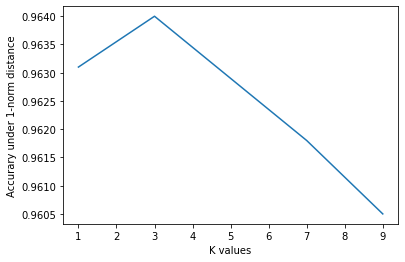

In [82]:
accuracy = []
accuracy.append(get_accuracy(predictions1, Ytest))
accuracy.append(get_accuracy(predictions3, Ytest))
accuracy.append(get_accuracy(predictions5, Ytest))
accuracy.append(get_accuracy(predictions7, Ytest))
accuracy.append(get_accuracy(predictions9, Ytest))
k_value = [1,3,5,7,9]
plt.plot(k_value, accuracy)
plt.xlabel("K values")
plt.ylabel("Accurary under 1-norm distance")
plt.show()

In [85]:
predictions12, predictions32, predictions52, predictions72, predictions92 = k_nearest_neighbor(Ytrain, test, Xtrain, 2, tree)

Calculating 2 0
Calculating 2 1000
Calculating 2 2000
Calculating 2 3000
Calculating 2 4000
Calculating 2 5000
Calculating 2 6000
Calculating 2 7000
Calculating 2 8000
Calculating 2 9000


Text(0, 0.5, 'Accurary under 2-norm distance')

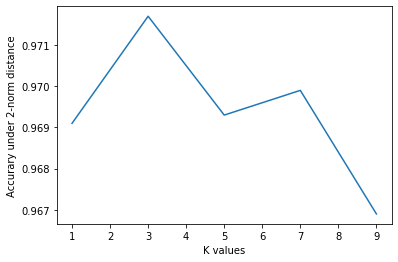

In [86]:
accuracy2 = []
accuracy2.append(get_accuracy(predictions12, Ytest))
accuracy2.append(get_accuracy(predictions32, Ytest))
accuracy2.append(get_accuracy(predictions52, Ytest))
accuracy2.append(get_accuracy(predictions72, Ytest))
accuracy2.append(get_accuracy(predictions92, Ytest))
plt.plot(k_value, accuracy2)
plt.xlabel("K values")
plt.ylabel("Accurary under 2-norm distance")